In [26]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
DATA_DIR = "/Users/hasnainmamdani/Academics/McGill/thesis/data/"
SCORE_DOMAINS = ['Global Cognition', 'Language', 'Visuospatial Functioning', 'Memory',\
                 'Information Processing Speed', 'Executive Functioning']

In [9]:
def get_patient_scores(data_dir):
    patient_df = pd.read_hdf(data_dir + 'patients.h5', 'p')
    scaler_Y = StandardScaler()
    return scaler_Y.fit_transform(np.array(patient_df[patient_df.columns[5:11]]))

In [14]:
Y = get_patient_scores(DATA_DIR)
print("Y.shape", Y.shape)

Y.shape (1401, 6)


In [43]:
def plot_pca_explained_variance(data):
    pca = PCA(copy=False)
    pca.fit(data)
#     data_pc = pca.fit_transform(data)
    
    plt.plot(pca.explained_variance_ratio_)
    plt.title("Variance captured by principal components")
    plt.xlabel("PC")
    plt.ylabel("Explained variance ratio")
#     plt.axhline(0.01, color="black")
    print(pca.explained_variance_ratio_)
    plt.show()    

[0.55305221 0.15856691 0.0984547  0.08159823 0.06296326 0.04536469]


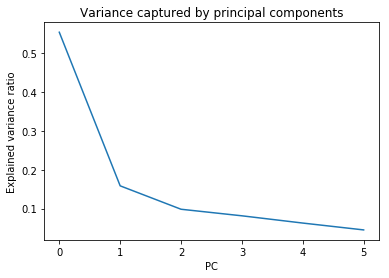

In [44]:
plot_pca_explained_variance(Y)

### Correlation plots

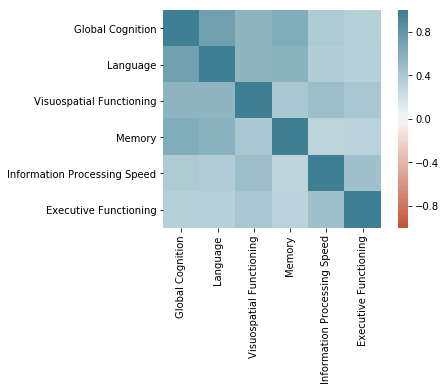

In [40]:
Y_df = pd.DataFrame(Y, columns=SCORE_DOMAINS)
corr = Y_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
#     cmap='coolwarm',
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

In [41]:
# raw numbers
corr

,Global Cognition,Language,Visuospatial Functioning,Memory,Information Processing Speed,Executive Functioning
Global Cognition,1.000000,0.719169,0.564950,0.631008,0.384037,0.345214
Language,0.719169,1.000000,0.549646,0.578309,0.363142,0.340554
Visuospatial Functioning,0.564950,0.549646,1.000000,0.401455,0.481641,0.412706
Memory,0.631008,0.578309,0.401455,1.000000,0.298716,0.325726
Information Processing Speed,0.384037,0.363142,0.481641,0.298716,1.000000,0.465310
Executive Functioning,0.345214,0.340554,0.412706,0.325726,0.465310,1.000000


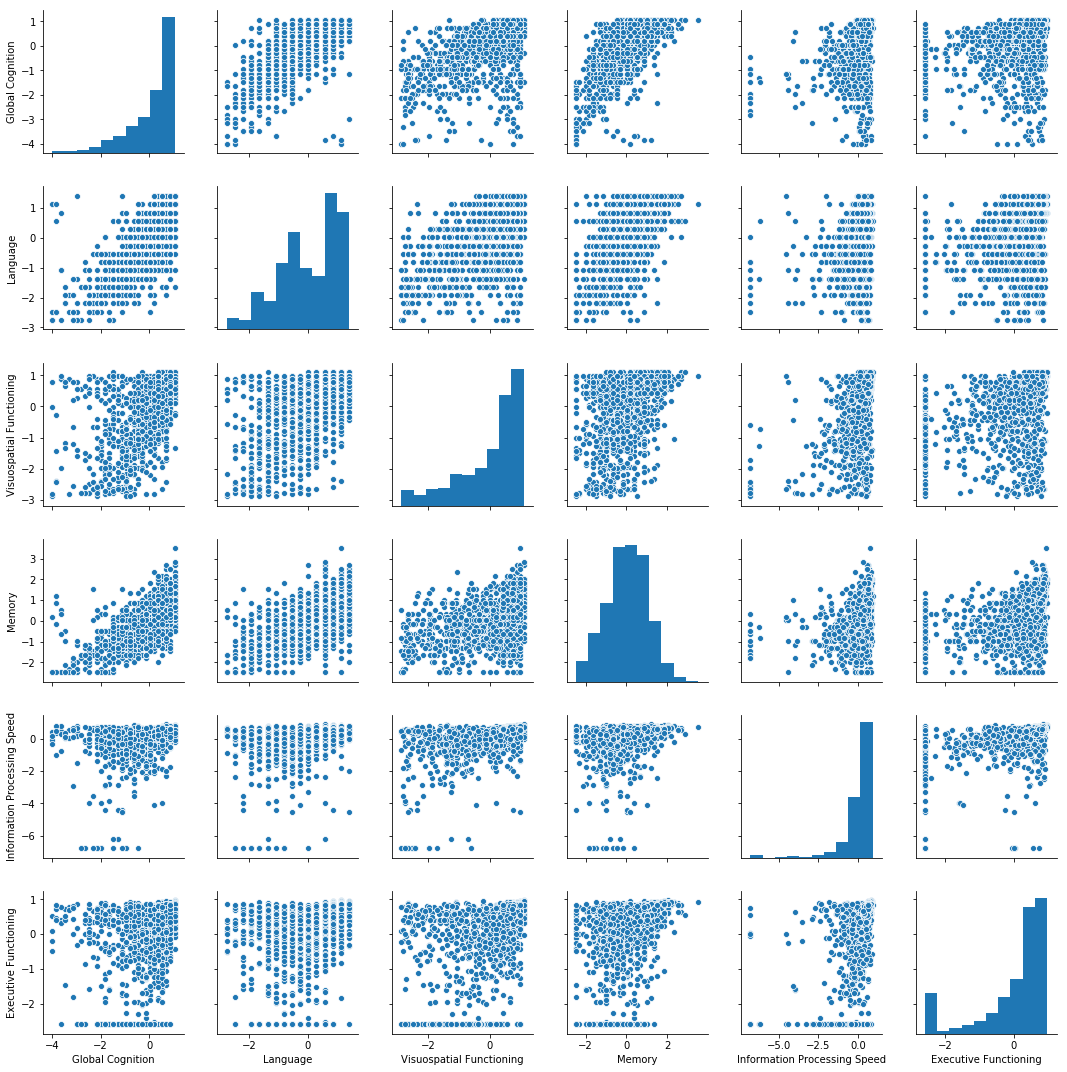

In [42]:
sns.pairplot(Y_df)